# User Story 1:

**AC-1: The system should provide detailed analysis of near-Earth 
objects including size metrics, orbital period calculations, 
and hazard classifications.**

1. Size distribution

In [0]:
%sql
SELECT size_category
     , size_category_label
     , COUNT(*) AS count
FROM neo_analysis
GROUP by size_category, size_category_label
ORDER BY count DESC     

size_category,size_category_label,count
100m-500m,Medium,11
50-100m,Small,7
10-50m,Small,6
<10m,Small,2
>500m,Large,1


Databricks visualization. Run in Databricks to view.

2. Orbital Period Summary

In [0]:
%sql
SELECT name
     , diameter_max_m
     , orbital_period_days
FROM neo_analysis
ORDER BY orbital_period_days DESC

name,diameter_max_m,orbital_period_days
(2015 RC),82.04,1336.23
(2015 TX237),130.03,1191.52
(2015 RN83),263.05,675.03
(2010 XT10),29.79,597.21
(2015 UG),162.94,538.6
465633 (2009 JR5),485.33,511.75
(2015 RO36),154.18,459.83
(2016 EK158),474.29,443.82
(2008 QV11),320.66,315.98
(2023 TP16),6.58,0.0


Databricks visualization. Run in Databricks to view.

3. Hazard Classification

In [0]:
%sql
SELECT hazard_level AS `Hazard Level`
     , COUNT(*) AS `Object Count`
FROM neo_analysis
GROUP BY hazard_level
  

Hazard Level,Object Count
Hazardous,1
Non-Hazardous,26


Databricks visualization. Run in Databricks to view.

**AC-2: When filtering by time periods, the system should display 
objects that had close approaches to Earth in the past 25 years or are predicted to approach in the next 25 years.**

1. All approaches in 50 years window

In [0]:
%sql
SELECT name
     , close_approach_date
     , miss_distance_km
     , hazard_level
     , in_50yr_window
FROM neo_analysis
ORDER BY close_approach_date

name,close_approach_date,miss_distance_km,hazard_level,in_50yr_window
(2016 RU33),2015-09-07,3.396606813324605E7,Non-Hazardous,true
(2015 RG2),2015-09-07,2450214.654065658,Non-Hazardous,true
(2020 BY),2015-09-07,6.0851422512182765E7,Non-Hazardous,true
(2016 RN41),2015-09-07,1.8031340714294095E7,Non-Hazardous,true
(2015 RH36),2015-09-07,1.6356725896225626E7,Non-Hazardous,true
(2015 RL35),2015-09-07,1.0359193665872922E7,Non-Hazardous,true
(2024 CU2),2015-09-07,3.949957037509691E7,Non-Hazardous,true
(2020 WZ),2015-09-07,6.914463696606024E7,Non-Hazardous,true
(2019 QK4),2015-09-07,5.050366279103138E7,Non-Hazardous,true
(2018 RZ2),2015-09-07,6.270173646813693E7,Non-Hazardous,true


2. Filter by size and hazard

In [0]:
%sql
SELECT name
     , diameter_max_m
     , size_category
     , size_category_label
     , close_approach_date
     , hazard_level
FROM neo_analysis
WHERE size_category_label = 'Large' 


name,diameter_max_m,size_category,size_category_label,close_approach_date,hazard_level
440012 (2002 LE27),711.28,>500m,Large,2015-09-07,Non-Hazardous


**AC-3:The system should categorize objects based on their 
hazard potential using established scientific criteria.**

1. Object count by Hazard category

In [0]:
%sql
SELECT hazard_category AS `Hazard Category`
     , COUNT(*) AS `Object Count`
FROM neo_analysis
GROUP BY hazard_category
ORDER BY `Object Count` DESC     

Hazard Category,Object Count
Low Risk,26
Moderate Risk,1


2. Filter High Risk objects

In [0]:
%sql
SELECT name
     , diameter_max_m
     , miss_distance_km
     , close_approach_date
FROM neo_analysis
WHERE hazard_category = 'High Risk'


name,diameter_max_m,miss_distance_km,close_approach_date


**AC-4: The analysis should include comparative data visualisations 
showing relationships between object characteristics (size, 
orbit time, approach distance).**

1. Size vs Approach distance

In [0]:
%sql
SELECT name
     , diameter_max_m AS `Size (meter)`
     , miss_distance_km AS `Miss Distance (km)`
     , log_diameter_max
     , log_miss_distance
FROM neo_analysis
ORDER BY log_diameter_max DESC
      


name,Size (meter),Miss Distance (km),log_diameter_max,log_miss_distance
440012 (2002 LE27),711.28,7.452503584094296E7,2.85,7.87
465633 (2009 JR5),485.33,4.529029822572566E7,2.69,7.66
(2016 EK158),474.29,4.19584976839103E7,2.68,7.62
(2019 QK4),430.57,5.050366279103138E7,2.64,7.7
(2008 QV11),320.66,3.876455855056069E7,2.51,7.59
(2015 RN83),263.05,2.5195177358205542E7,2.42,7.4
(2015 FC35),220.82,4.807702245747053E7,2.35,7.68
(2018 RZ2),215.79,6.270173646813693E7,2.34,7.8
(2021 QP3),171.41,5.9086618145208485E7,2.24,7.77
(2015 UG),162.94,1.6940461018585347E7,2.21,7.23


Databricks visualization. Run in Databricks to view.

2. Size vs Orbital period

In [0]:
%sql
SELECT name AS `Object Name`
     , diameter_max_m AS `Size (meter)`
     , orbital_period_days AS `Orbital Period (days)`
     , orbital_period_years AS `Orbital Period (years)`
FROM neo_analysis

Object Name,Size (meter),Orbital Period (days),Orbital Period (years)
465633 (2009 JR5),485.33,511.75,1.4
(2008 QV11),320.66,315.98,0.87
(2010 XT10),29.79,597.21,1.64
(2015 RC),82.04,1336.23,3.66
(2015 RO36),154.18,459.83,1.26
(2015 RN83),263.05,675.03,1.85
(2015 TX237),130.03,1191.52,3.26
(2015 UG),162.94,538.6,1.47
(2016 EK158),474.29,443.82,1.22
(2016 RT),78.35,0.0,0.0


Databricks visualization. Run in Databricks to view.

3. Orbital period vs Approach distance


In [0]:
%sql
SELECT name AS `Object Name`
     , diameter_max_m AS `Obect Size (meter)`
     , miss_distance_abs_km AS `Miss Distance (km)`
     , orbital_period_years AS `Orbit Period (years)`
FROM neo_analysis

Object Name,Obect Size (meter),Miss Distance (km),Orbit Period (years)
465633 (2009 JR5),485.33,4.529029823E7,1.4
(2008 QV11),320.66,3.876455855E7,0.87
(2010 XT10),29.79,7.356378239E7,1.64
(2015 RC),82.04,4027962.7,3.66
(2015 RO36),154.18,8086032.0,1.26
(2015 RN83),263.05,2.519517736E7,1.85
(2015 TX237),130.03,1.189660243E7,3.26
(2015 UG),162.94,1.694046102E7,1.47
(2016 EK158),474.29,4.195849768E7,1.22
(2016 RT),78.35,2.55371982E7,0.0


Databricks visualization. Run in Databricks to view.

**AC-5: The system should allow for sorting and filtering of NEOs 
based on multiple parameters simultaneously.**

1. Filter by Size, Hazard, and Approach Distance

In [0]:
%sql
SELECT name
     , diameter_max_m
     , hazard_category
     , miss_distance_abs_km
     , hazard_category
     , hazard_level
FROM neo_analysis
WHERE hazard_category = 'Low Risk'
  AND diameter_max_m > 300
ORDER BY miss_distance_abs_km DESC


name,diameter_max_m,hazard_category,miss_distance_abs_km,hazard_category,hazard_level
440012 (2002 LE27),711.28,Low Risk,7.452503584E7,Low Risk,Non-Hazardous
(2019 QK4),430.57,Low Risk,5.050366279E7,Low Risk,Non-Hazardous
(2016 EK158),474.29,Low Risk,4.195849768E7,Low Risk,Non-Hazardous
(2008 QV11),320.66,Low Risk,3.876455855E7,Low Risk,Non-Hazardous


2. Filter by Orbital Period and Velocity

In [0]:
%sql
SELECT name `Object Name`
     , orbital_period_years `Orbit Period (years)`
     , velocity_km_s `Velocity (KM per Second)`
FROM neo_analysis
WHERE orbital_period_years BETWEEN 1 AND 5
  AND velocity_km_s > 12
ORDER BY velocity_km_s DESC

Object Name,Orbit Period (years),Velocity (KM per Second)
(2015 RC),3.66,19.49
(2010 XT10),1.64,19.15
465633 (2009 JR5),1.4,18.13
(2016 EK158),1.22,16.96
(2015 RO36),1.26,15.81
(2015 RN83),1.85,12.08


3. Filter by Date Range and Size Category

In [0]:
%sql
SELECT name `Object Name`
     , close_approach_date `Approach Date`
     , size_category_label `Size Category` 
     , diameter_max_m `Size (meter)`
FROM neo_analysis
WHERE close_approach_date BETWEEN '2000-01-01' AND '2030-12-31'
  AND size_category_label IN ('Large', 'Medium')
ORDER BY close_approach_date

Object Name,Approach Date,Size Category,Size (meter)
(2015 RX83),2015-09-07,Medium,156.33
440012 (2002 LE27),2015-09-07,Large,711.28
(2019 QK4),2015-09-07,Medium,430.57
(2018 RZ2),2015-09-07,Medium,215.79
(2015 FC35),2015-09-07,Medium,220.82
(2015 UG),2015-09-08,Medium,162.94
(2008 QV11),2015-09-08,Medium,320.66
(2016 EK158),2015-09-08,Medium,474.29
(2015 RO36),2015-09-08,Medium,154.18
465633 (2009 JR5),2015-09-08,Medium,485.33


**AC-6: The system should provide detailed individual object profiles 
for objects of particular interest**

1. Query Individual Object Profiles

In [0]:
%sql
SELECT *
  FROM neo_analysis
WHERE neo_id = '2465633'  


neo_id,name,close_approach_date,diameter_min_m,diameter_max_m,absolute_magnitude_h,velocity_km_h,velocity_km_s,miss_distance_km,miss_distance_abs_km,size_avg,size_category,size_category_label,in_50yr_window,orbital_period_days,orbital_period_years,is_potentially_hazardous,hazard_level,hazard_category,distance_category,log_diameter_max,log_miss_distance
2465633,465633 (2009 JR5),2015-09-08,217.05,485.33,20.44,65260.57,18.13,4.529029822572566E7,4.529029823E7,351.1903847653,100m-500m,Medium,true,511.75,1.4,true,Hazardous,Moderate Risk,>5M km,2.69,7.66


# User Story 2:

**AC 1: The system should provide statistical analysis of near-Earth object (NEO) close approaches over a defined time period**

1. Close Approaches over time

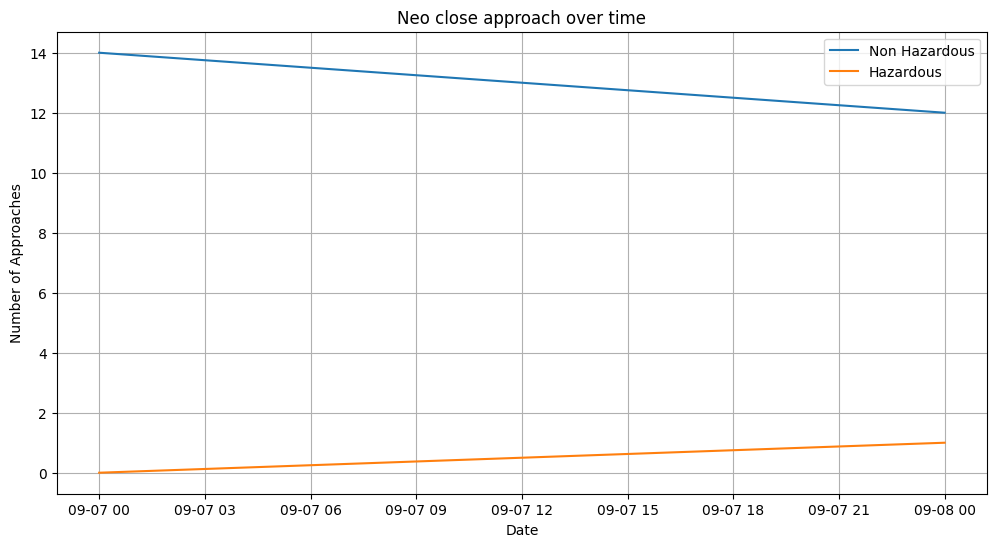

In [0]:
# Time Series of close approaches
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select close_approach_date, hazard_category FROM neo_analysis")
pdf = df.toPandas()

# group by date and hazard status
time_series = pdf.groupby(["close_approach_date", "hazard_category"]).size().unstack(fill_value=0)

# plot
time_series.plot(kind="line", figsize=(12,6), title="Neo close approach over time")
plt.ylabel("Number of Approaches")
plt.xlabel("Date")
plt.legend(["Non Hazardous", "Hazardous"])
plt.grid(True)
plt.show()

2. Size Distribution Histogram

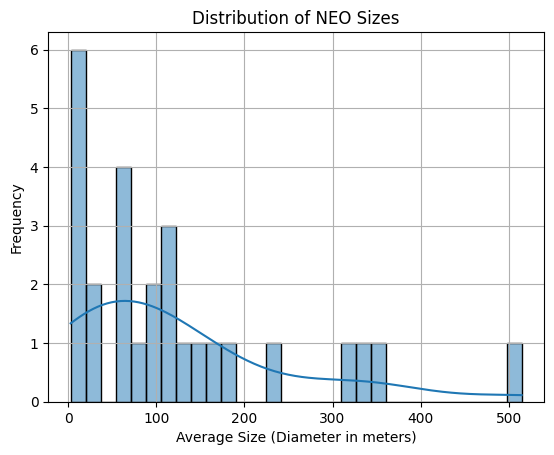

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = spark.sql("""
SELECT size_avg FROM neo_analysis
""")
pdf = df.toPandas()

sns.histplot(pdf["size_avg"], bins=30, kde=True)
plt.title("Distribution of NEO Sizes")
plt.xlabel("Average Size (Diameter in meters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [0]:
%sql
SELECT size_avg
FROM neo_analysis

size_avg
351.1903847653
232.0291862177
21.5547314748
59.366660120649996
111.56876272225
190.3455012433
94.08981548444999
117.90782192615
343.19631563445
56.6947202721


Databricks visualization. Run in Databricks to view.

**AC-2: When filtering by object size ranges, the system should show frequency distribution accordingly**

1. Frequency Distribution Query (size_category, Hazard_category)


In [0]:
%sql
SELECT size_category AS `Size Category`
     , hazard_category AS `Hazard Category`
     , COUNT(*) AS frequency
FROM neo_analysis     
GROUP BY size_category, hazard_category
ORDER BY hazard_category DESC

Size Category,Hazard Category,frequency
100m-500m,Moderate Risk,1
<10m,Low Risk,2
50-100m,Low Risk,7
10-50m,Low Risk,6
100m-500m,Low Risk,10
>500m,Low Risk,1


Databricks visualization. Run in Databricks to view.

**AC-3: The system should categorize objects by their minimum distance from Earth during close approaches.**

1. Frequency by distance

In [0]:
%sql
SELECT distance_category AS `Distance Range (km)`
     , COUNT(*) AS `frequency`
FROM neo_analysis
GROUP BY distance_category
ORDER BY frequency DESC


Distance Range (km),frequency
>5M km,25
1M-5M km,2


Databricks visualization. Run in Databricks to view.

**AC: 4 The system should clearly identify which objects are classified as "potentially hazardous" and analyse their frequency separately**

In [0]:
%sql
SELECT is_potentially_hazardous
     , COUNT(*) AS frequency
FROM neo_analysis
GROUP BY is_potentially_hazardous

is_potentially_hazardous,frequency
true,1
false,26


Frequency with Hazard label

In [0]:
%sql
SELECT hazard_level
     , COUNT(*) AS frequency
FROM neo_analysis
GROUP BY hazard_level
ORDER BY frequency DESC

hazard_level,frequency
Non-Hazardous,26
Hazardous,1


Closest Hazardous Objects Table (Top 10)

In [0]:
%sql
SELECT name
     , close_approach_date
     , size_avg
     , miss_distance_km
     , hazard_level
FROM neo_analysis
WHERE is_potentially_hazardous = TRUE 
ORDER BY miss_distance_km ASC
LIMIT 10

name,close_approach_date,size_avg,miss_distance_km,hazard_level
465633 (2009 JR5),2015-09-08,351.1903847653,4.529029822572566E7,Hazardous


**AC: 5 The analysis should include visualizations (charts/graphs) showing trends and patterns in NEO approaches. (Done above using databricks SQL, visualization)**

1. Miss Distance Distribution

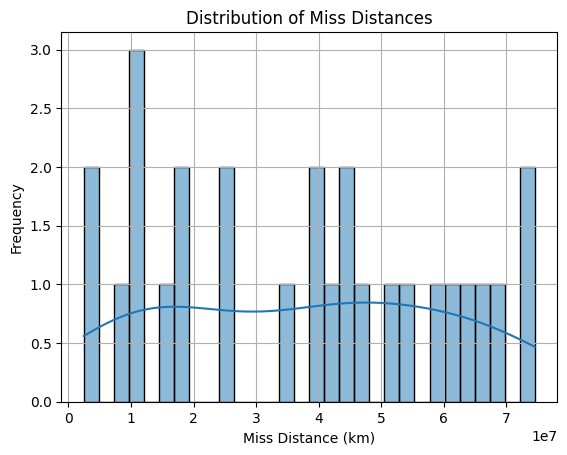

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Gold layer into Pandas
df = spark.table("neo_analysis").toPandas()

sns.histplot(df["miss_distance_km"], bins=30, kde=True)
plt.title("Distribution of Miss Distances")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**AC: 6 The system should provide comparative analysis between potentially hazardous and non-hazardous objects. **

1. Hazard_level vs Average size comparison

In [0]:
%sql
SELECT hazard_level AS `Hazard Level`
     , AVG(size_avg) AS `Average Size (in meters)`
FROM neo_analysis
GROUP BY hazard_level

Hazard Level,Average Size (in meters)
Hazardous,351.1903847653
Non-Hazardous,115.21716486990961


Databricks visualization. Run in Databricks to view.

2. Hazard_level vs Average Miss Distance comparison

In [0]:
%sql
SELECT hazard_level AS `Hazard Level`
     , AVG(miss_distance_abs_km) AS `Average Miss Distance (km)`
FROM neo_analysis
GROUP BY hazard_level

Hazard Level,Average Miss Distance (km)
Hazardous,4.529029823E7
Non-Hazardous,3.717143511E7


Databricks visualization. Run in Databricks to view.